# Candlestick Gravestone Doji

https://www.investopedia.com/terms/g/gravestone-doji.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'ZM'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


## Candlestick with Gravestone Doji

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737167.0,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,False
1,737171.0,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,True
2,737172.0,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,True
3,737173.0,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,False
4,737174.0,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,True


Text(0, 0.5, 'Price')

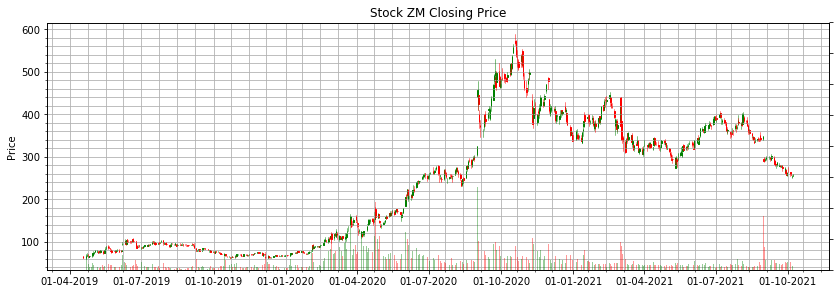

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
gravestone_doji = talib.CDLGRAVESTONEDOJI(df['Open'], df['High'], df['Low'], df['Close'])

gravestone_doji = gravestone_doji[gravestone_doji != 0]

In [6]:
df['gravestone_doji'] = talib.CDLGRAVESTONEDOJI(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['gravestone_doji'] !=0]

,Open,High,Low,Close,Adj Close,Volume,gravestone_doji
Date,,,,,,,
2019-10-17,67.089996,68.000000,66.760002,67.029999,67.029999,3496800,100
2020-01-13,73.889999,75.580002,73.800003,74.029999,74.029999,3347100,100
2020-05-22,171.860001,175.889999,170.199997,171.059998,171.059998,4302200,100
2020-07-28,252.699997,258.910004,251.320007,252.179993,252.179993,3366200,100
2020-09-16,406.273987,419.420013,404.220001,408.170013,408.170013,6739800,100
2020-10-02,485.005005,507.489990,481.000000,482.230011,482.230011,12791700,100
2020-12-04,409.260010,418.880005,408.186005,410.010010,410.010010,4447300,100
2021-03-22,329.450012,333.890015,327.010010,328.500000,328.500000,2947900,100
2021-04-01,325.980011,338.910004,325.500000,326.230011,326.230011,2853900,100


In [8]:
df['Adj Close'].loc[df['gravestone_doji'] !=0]

Date
2019-10-17     67.029999
2020-01-13     74.029999
2020-05-22    171.059998
2020-07-28    252.179993
2020-09-16    408.170013
2020-10-02    482.230011
2020-12-04    410.010010
2021-03-22    328.500000
2021-04-01    326.230011
2021-05-28    331.529999
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['gravestone_doji'] !=0].index

DatetimeIndex(['2019-10-17', '2020-01-13', '2020-05-22', '2020-07-28',
               '2020-09-16', '2020-10-02', '2020-12-04', '2021-03-22',
               '2021-04-01', '2021-05-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
gravestone_doji

Date
2019-10-17    100
2020-01-13    100
2020-05-22    100
2020-07-28    100
2020-09-16    100
2020-10-02    100
2020-12-04    100
2021-03-22    100
2021-04-01    100
2021-05-28    100
dtype: int32

In [11]:
gravestone_doji.index

DatetimeIndex(['2019-10-17', '2020-01-13', '2020-05-22', '2020-07-28',
               '2020-09-16', '2020-10-02', '2020-12-04', '2021-03-22',
               '2021-04-01', '2021-05-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,gravestone_doji
Date,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,0
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,0
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,0
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,0
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,0
...,...,...,...,...,...,...,...
2021-10-01,268.770996,274.570007,262.700012,267.510010,267.510010,8664800,0
2021-10-04,264.239990,264.572998,253.410004,259.579987,259.579987,5004600,0
2021-10-05,259.839996,262.739990,256.850006,257.119995,257.119995,3712100,0


Text(0, 0.5, 'Price')

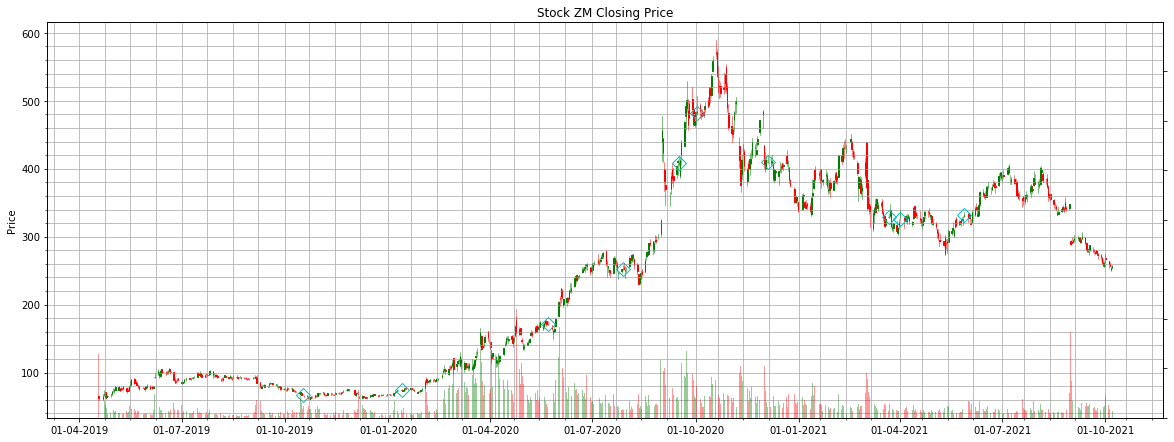

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['gravestone_doji'] !=0].index, df['Adj Close'].loc[df['gravestone_doji'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-04-01':'2021-06-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,gravestone_doji,VolumePositive
0,737881.0,325.980011,338.910004,325.500000,326.230011,326.230011,2853900,100,True
1,737885.0,327.829987,328.500000,313.100006,323.959991,323.959991,3024700,0,False
2,737886.0,323.750000,332.660004,321.660004,329.790009,329.790009,3767100,0,True
3,737887.0,329.109985,333.440002,319.230011,323.079987,323.079987,4197700,0,False
4,737888.0,326.850006,333.989990,326.000000,331.279999,331.279999,2821500,0,True


Text(0, 0.5, 'Price')

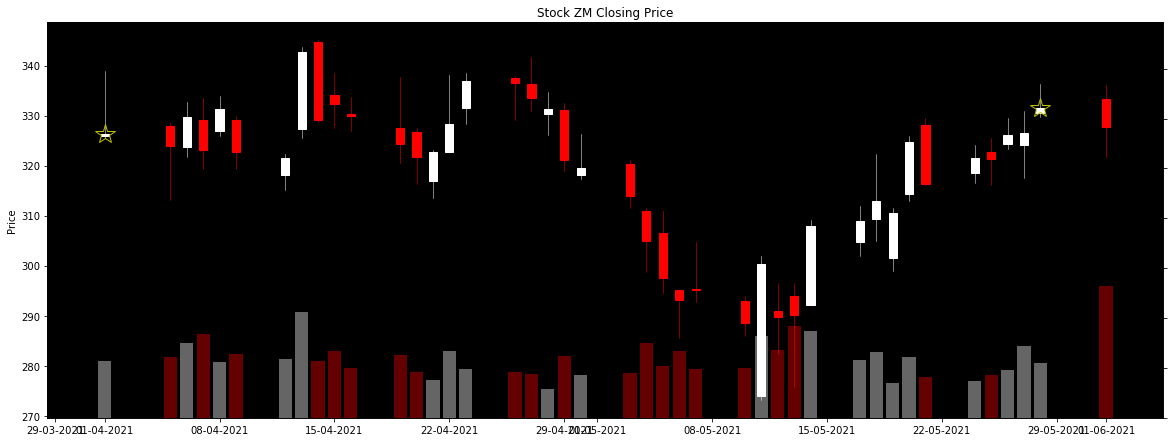

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='w', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['gravestone_doji'] !=0].index, df['Adj Close'].loc[df['gravestone_doji'] !=0],
                '*y', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'w', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

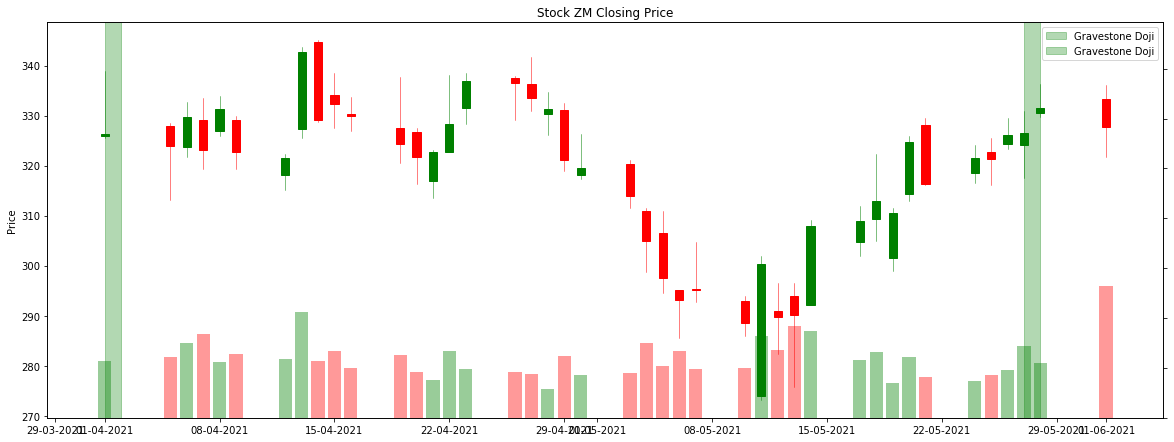

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,4,1)), date2num(datetime(2021,4,2)), 
           label="Gravestone Doji",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2021,5,27)), date2num(datetime(2021,5,28)), 
           label="Gravestone Doji",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')